In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [13]:
df = pd.read_csv('diwali_sales.csv', encoding= 'unicode_escape')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [16]:
df.drop(['Status' ,'unnamed1'] , axis = 1, inplace = True)

In [19]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
df.dropna(inplace = True)

In [21]:
df.shape

(11239, 13)

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

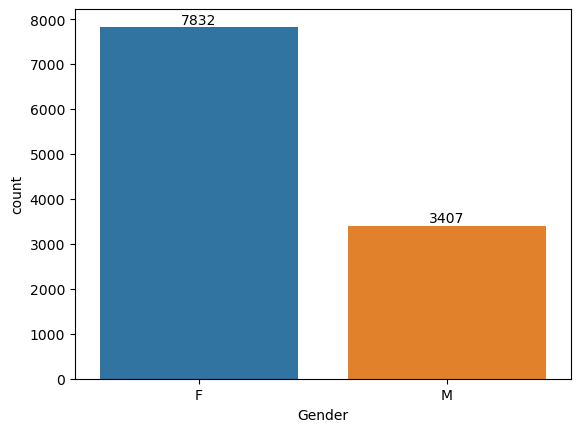

In [28]:
ax =sns.countplot(df , x = 'Gender')

for bars in ax.containers:  # this will give exact number 
    ax.bar_label(bars) 

In [38]:
sales_gen=df.groupby(["Gender"] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sales_gen

 

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

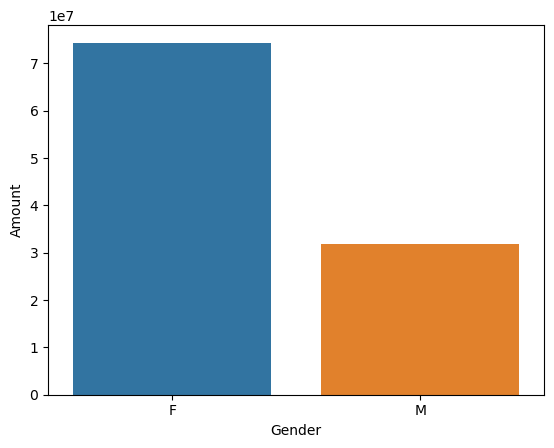

In [39]:
sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_gen)

 Till now we can say that females are spending more than males and number of 
 customer is also most likely females

<Axes: xlabel='Age Group', ylabel='count'>

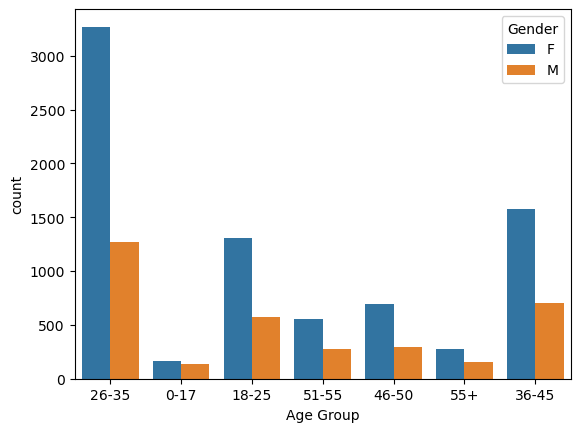

In [40]:
sns.countplot(data = df , x = 'Age Group' , hue = 'Gender')

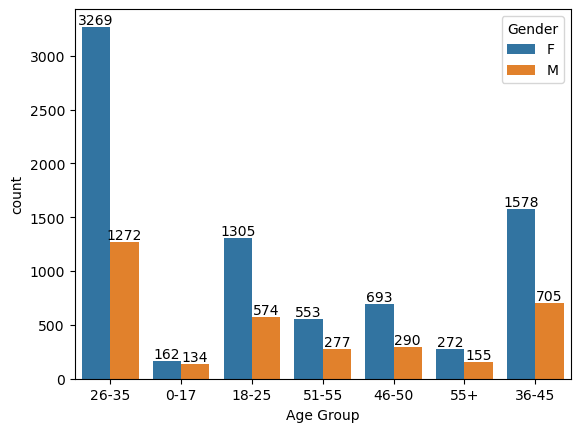

In [42]:
ax = sns.countplot(df, x = "Age Group" , hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

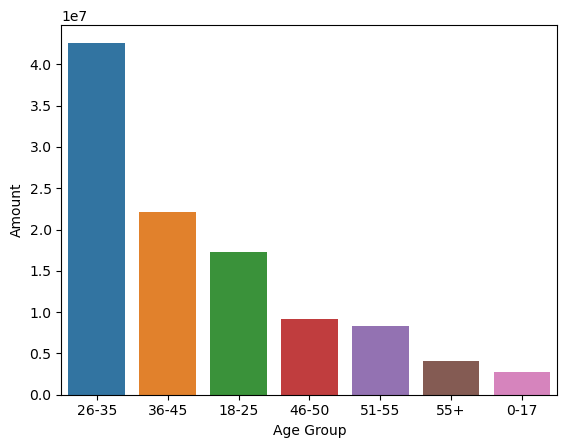

In [51]:
sales_age  = df.groupby(['Age Group'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(sales_age,x = 'Age Group' , y ='Amount')

most of the buyer are of age group between 26 -35 yrs female

<Axes: xlabel='State', ylabel='Orders'>

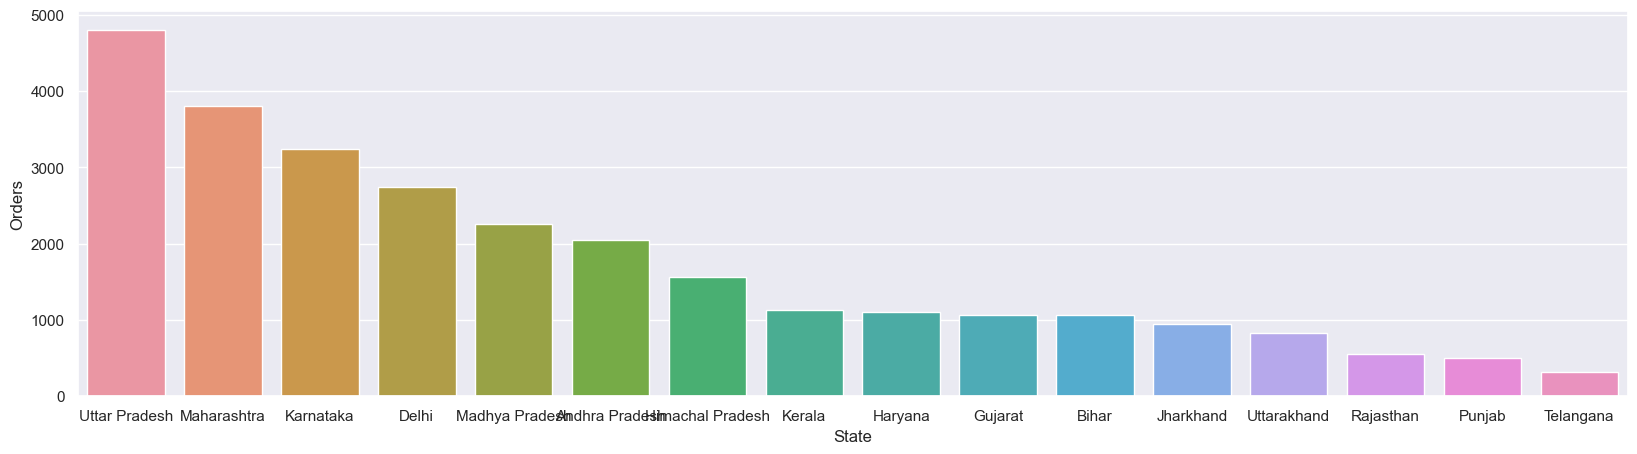

In [71]:
sales_state =  df.groupby(['State'] , as_index = False)['Orders'].sum().sort_values('Orders' , ascending = False)

sns.set(rc={"figure.figsize":(20, 5)} ) # this is used to adjust below figure size

sns.barplot(sales_state , x = 'State' , y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

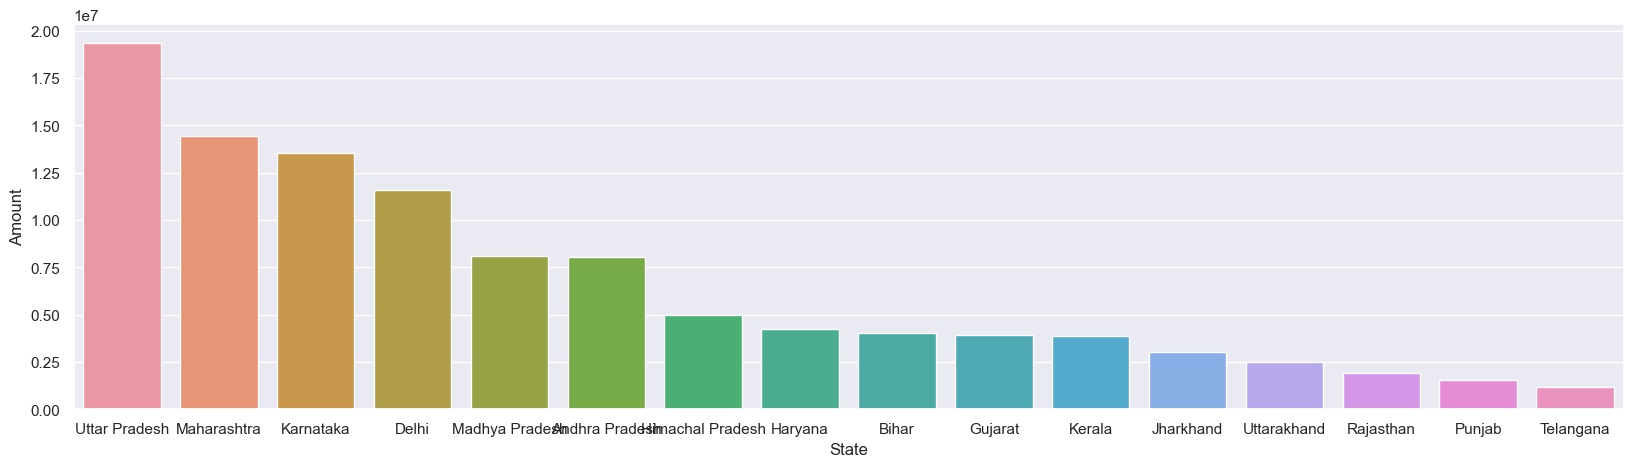

In [72]:
sales_state =  df.groupby(['State'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False)

sns.set(rc={"figure.figsize":(20, 5)} ) # this is used to adjust below figure size

sns.barplot(sales_state , x = 'State' , y = 'Amount')

Most of the order and total sales from UP , Maharashtra and karnataka

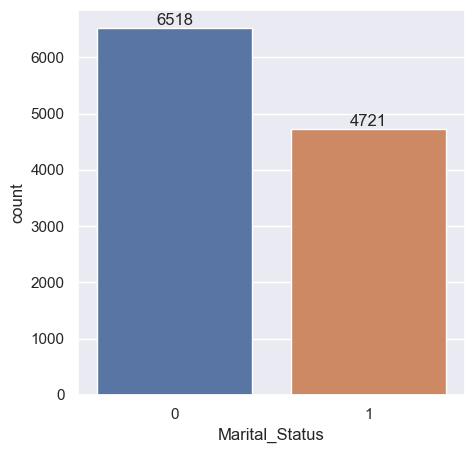

In [80]:
ax = sns.countplot(df , x = 'Marital_Status')
sns.set(rc ={'figure.figsize': (1,5)})

for bars in ax.containers:
    ax.bar_label(bars)

In [86]:
sales_state = df.groupby(['Marital_Status' , 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount' , ascending = False)

sales_state

,Marital_Status,Gender,Amount
0,0,F,43786648.44
2,1,F,30549207.99
1,0,M,18338738.00
3,1,M,13574538.00


<Axes: xlabel='Marital_Status', ylabel='Amount'>

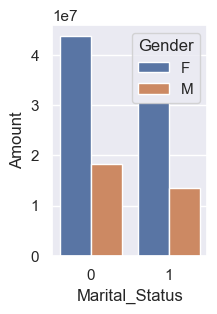

In [85]:
sns.set(rc = {'figure.figsize':(2,3)})

sns.barplot(data = sales_state , x = 'Marital_Status' , y = 'Amount', hue = 'Gender')

Married women are more than the unmarried

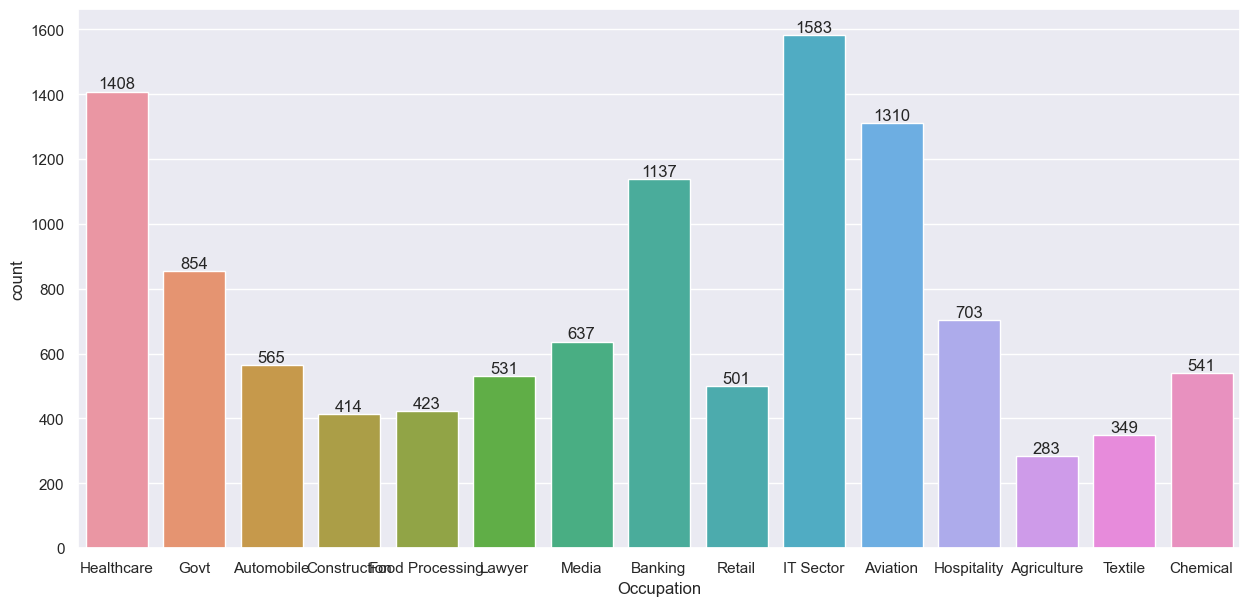

In [95]:
sns.set(rc = {'figure.figsize': (15,7)})
ax = sns.countplot(df , x = 'Occupation')

for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Occupation', ylabel='Amount'>

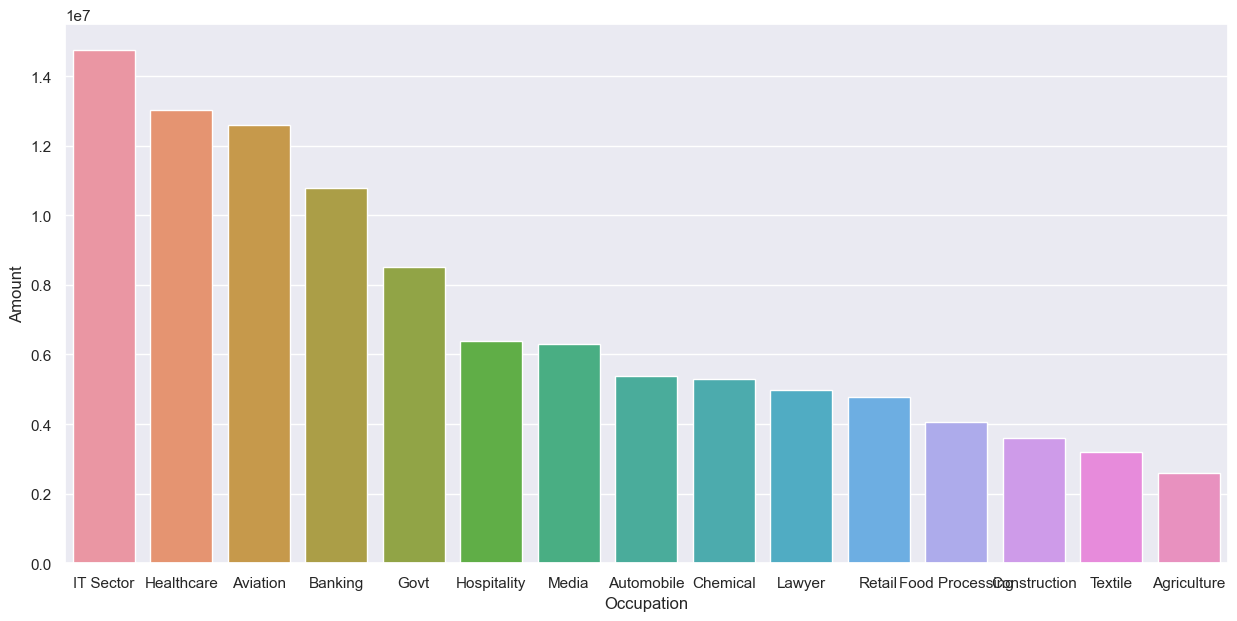

In [101]:
sales_occupation = df.groupby(['Occupation'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False)
sns.set({'figure.figsize': (15 , 7)})

sns.barplot(sales_occupation , x = 'Occupation' , y= 'Amount')


most buyer  working in IT , healthcare , aviation

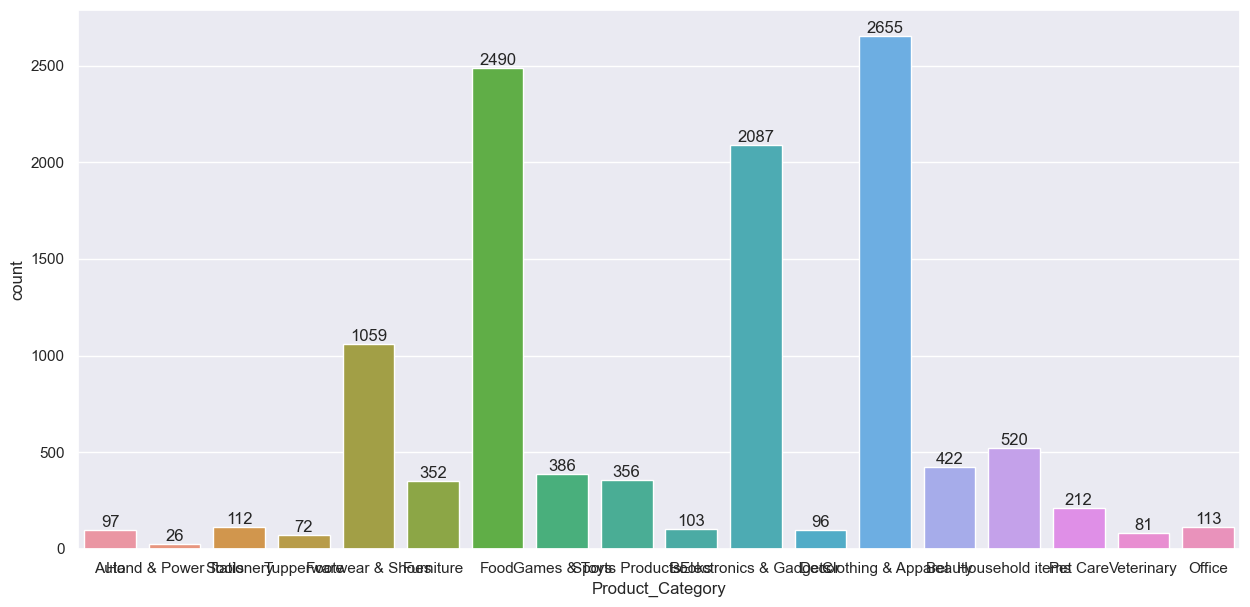

In [108]:
ax = sns.countplot(df, x = 'Product_Category')

for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Product_Category', ylabel='Amount'>

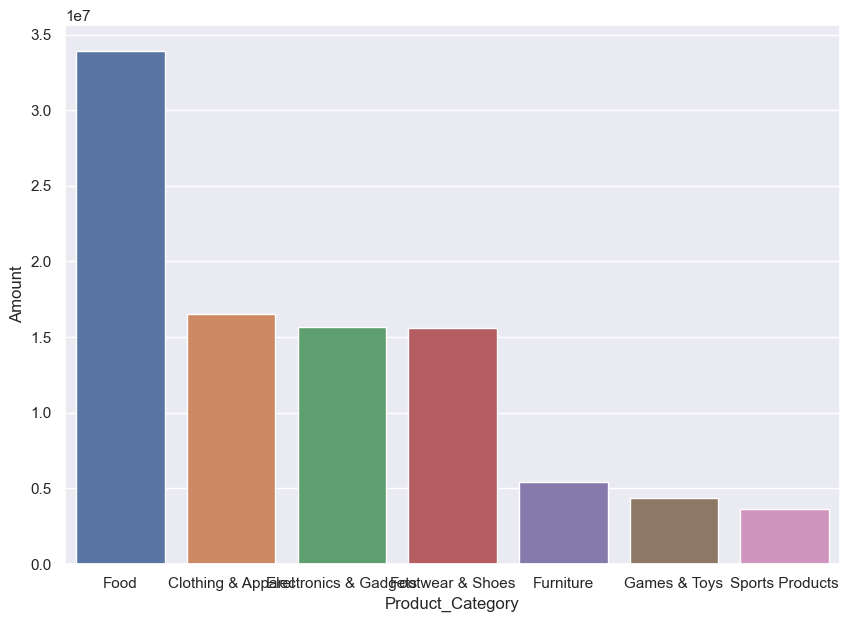

In [118]:
sales_occupation = df.groupby(['Product_Category'] , as_index = False)['Amount'].sum().sort_values('Amount' , ascending = False).head(7)
sns.set({'figure.figsize': (10 , 7)})

sns.barplot(sales_occupation , x = 'Product_Category' , y= 'Amount')



Most of the amount is spent on food , clothing and electronics

<Axes: xlabel='Product_Category', ylabel='Orders'>

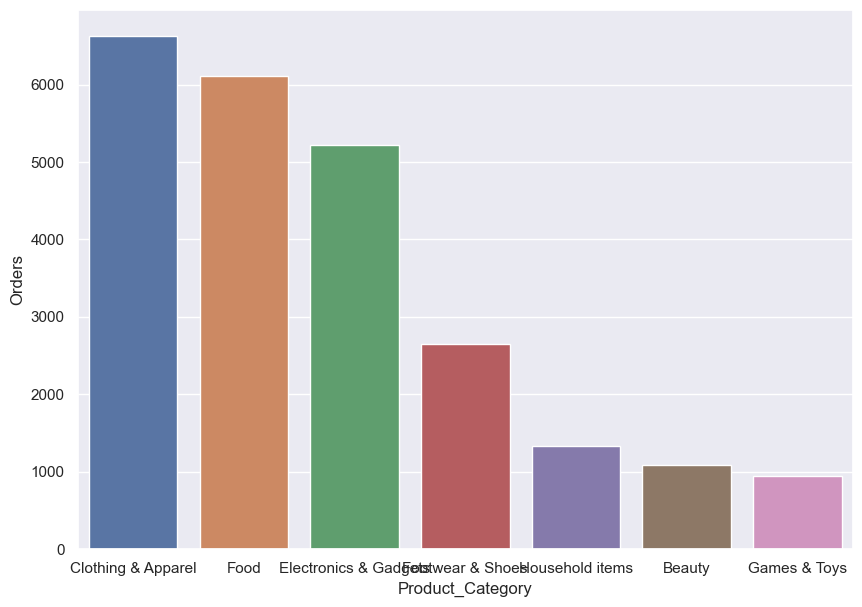

In [116]:
sales_occupation = df.groupby(['Product_Category'] , as_index = False)['Orders'].sum().sort_values('Orders' , ascending = False).head(7)
sns.set({'figure.figsize': (10 , 7)})

sns.barplot(sales_occupation , x = 'Product_Category' , y= 'Orders')

Conclusion

Married women age group 26 - 35 yrs from UP , Maharashtra and Karnataka working in IT , Healthcare, Aviation are more likely buy product from Food , clothing and Electronics Category